# Uploading Data to Google colab Server

In [1]:
from google.colab import files

In [36]:
uploaded= files.upload()

Saving Vertex Nexus Sales Data.csv to Vertex Nexus Sales Data (1).csv


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #importing the libraries here

In [38]:
df = pd.read_csv("Vertex Nexus Sales Data.csv", encoding= 'unicode_escape')


In [39]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [41]:
df.drop(['Status','unnamed1'], axis=1,  inplace= True)

In [42]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [43]:
df.dropna(inplace=True)

In [44]:
df['Amount']=df['Amount'].astype('int')

In [45]:
df['Amount'].dtypes

dtype('int64')

# Exploratory Data Analysis

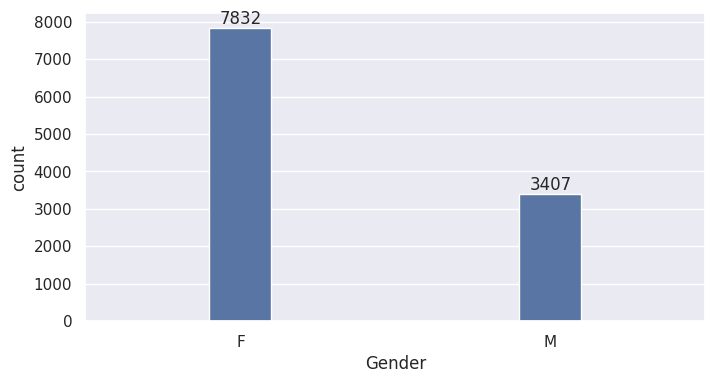

In [ ]:
#Count Number of Male, Female Customers

sns.set(rc={'figure.figsize':(8,4)})

ax= sns.countplot(x='Gender', data =  df, width=0.2)

for bars in ax.containers:
  ax.bar_label(bars)

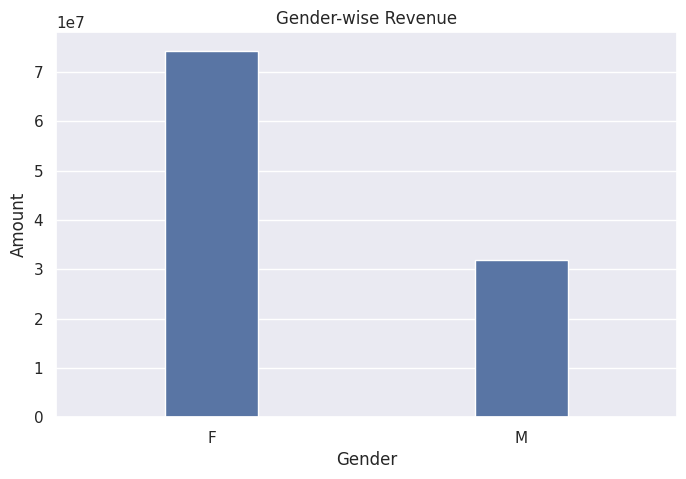

In [ ]:
sales_gen = df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.barplot(x= 'Gender', y= 'Amount', data=sales_gen, width=0.3).set(title="Gender-wise Revenue")
plt.show()

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

[Text(0.5, 1.0, 'Age-wise order')]

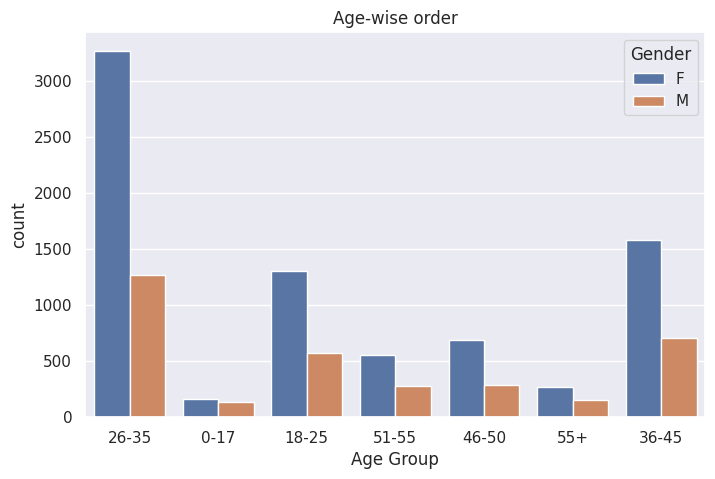

In [ ]:
sns.countplot(data=df, x='Age Group', hue='Gender').set(title="Age-wise order")

[Text(0.5, 1.0, 'Age-wise Revenue')]

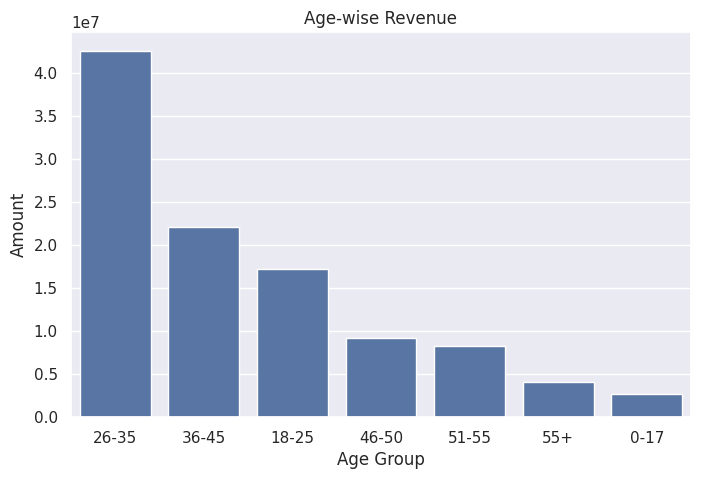

In [51]:
sales_age=df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='Age Group',y = 'Amount', data=sales_age).set(title="Age-wise Revenue")

From above graphs, we can see that most of the buyers are of age group between 26-35 years female

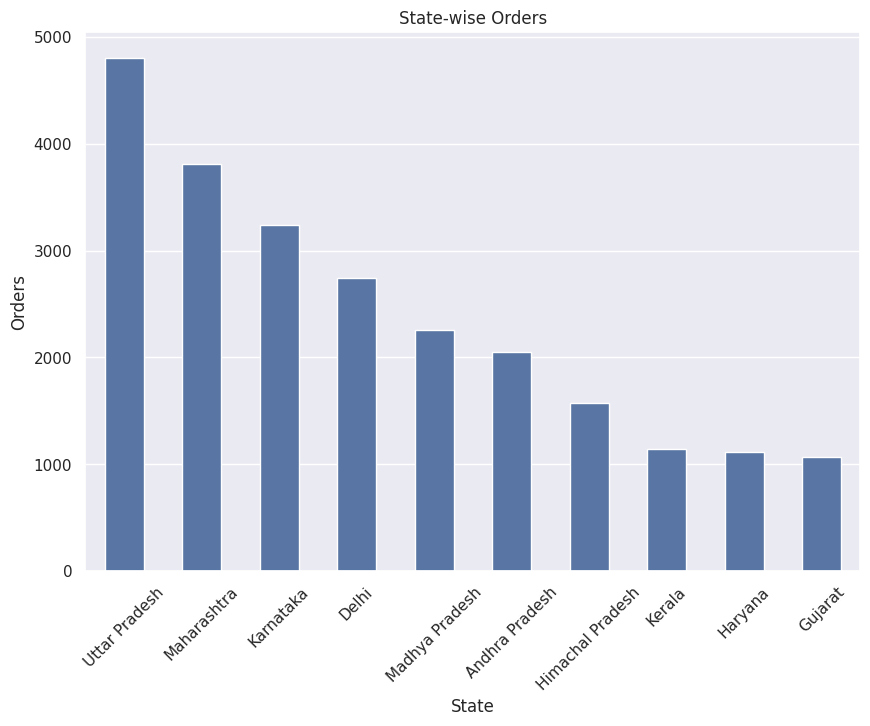

In [50]:
#total number of orders from top 10 states

sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(data=sales_state,x='State',y='Orders',width=0.5).set(title="State-wise Orders")
plt.xticks(rotation=45)
plt.show()


Uttar Pradesh is giving maximum number of orders

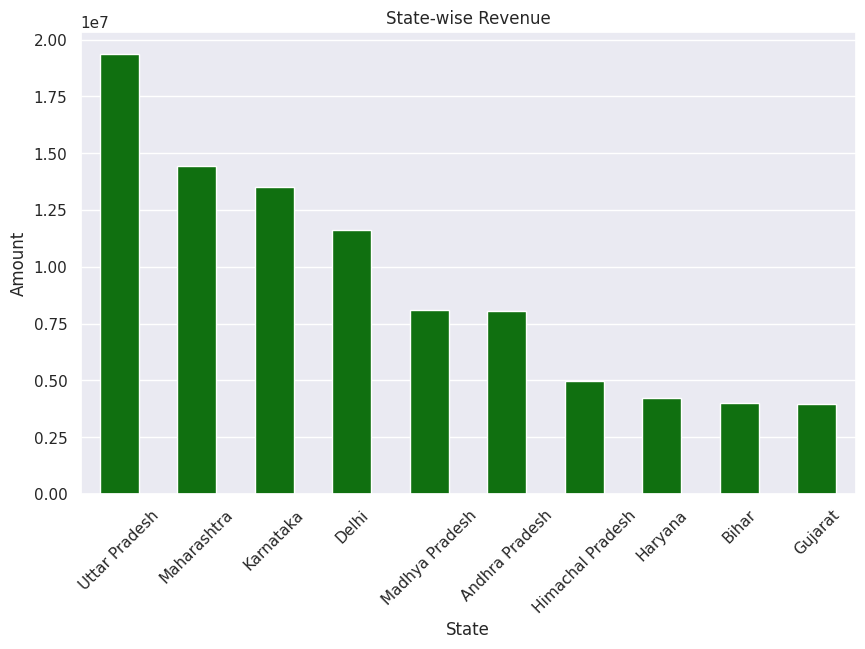

In [49]:
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(10,6)})

sns.barplot(data=sales_state,x='State',y='Amount',width=0.5,color="Green").set(title="State-wise Revenue")
plt.xticks(rotation=45)
plt.show()

At 8th position in Number of orders, we have kerala but haryana has generated more revenue than kerala even after having less number of orders

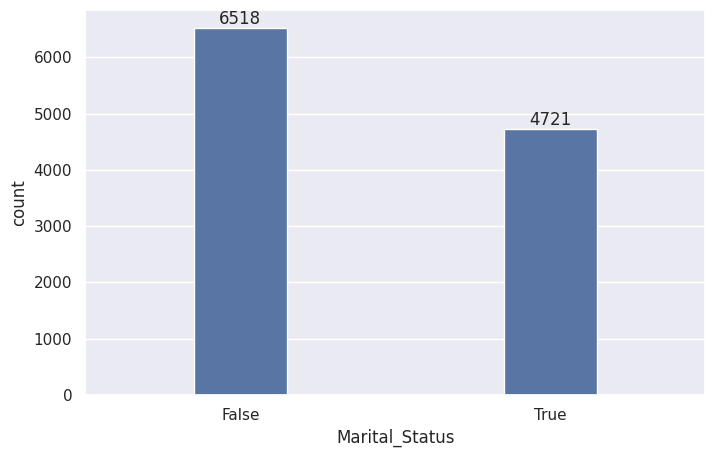

In [47]:
df['Marital_Status'] = df['Marital_Status'].map({0: 'False', 1: 'True'})

ax=sns.countplot(data=df,x='Marital_Status', width = 0.3)
sns.set(rc={'figure.figsize':(8,5)})

for bars in ax.containers:
  ax.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

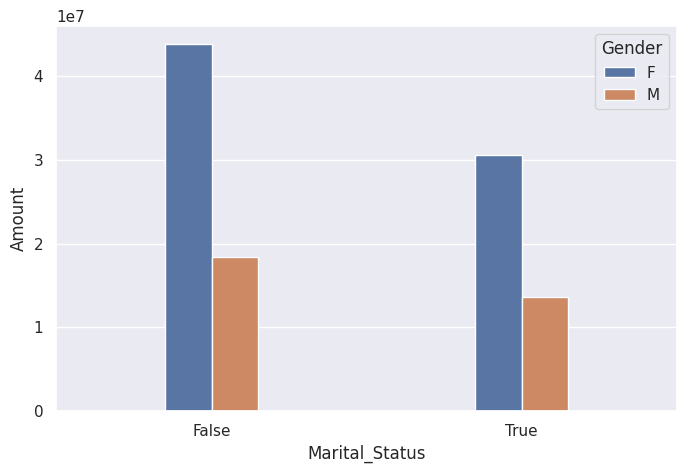

In [48]:
mx=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data=mx,x='Marital_Status', y='Amount', hue='Gender', width = 0.3)



Unmarried Females generated the maximum amount of revenue, showing our potential target customers

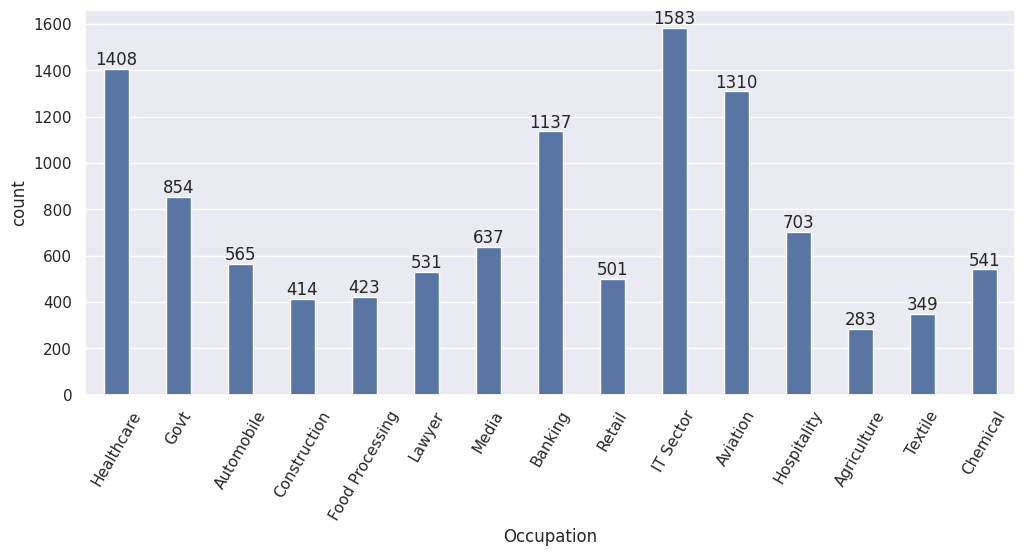

In [52]:
sns.set(rc={'figure.figsize':(12,5)})
ax=sns.countplot(data=df,x='Occupation', width =0.4)

for bars in ax.containers:
  ax.bar_label(bars)

plt.xticks(rotation=60)
plt.show()

Max amount of people are in IT sector

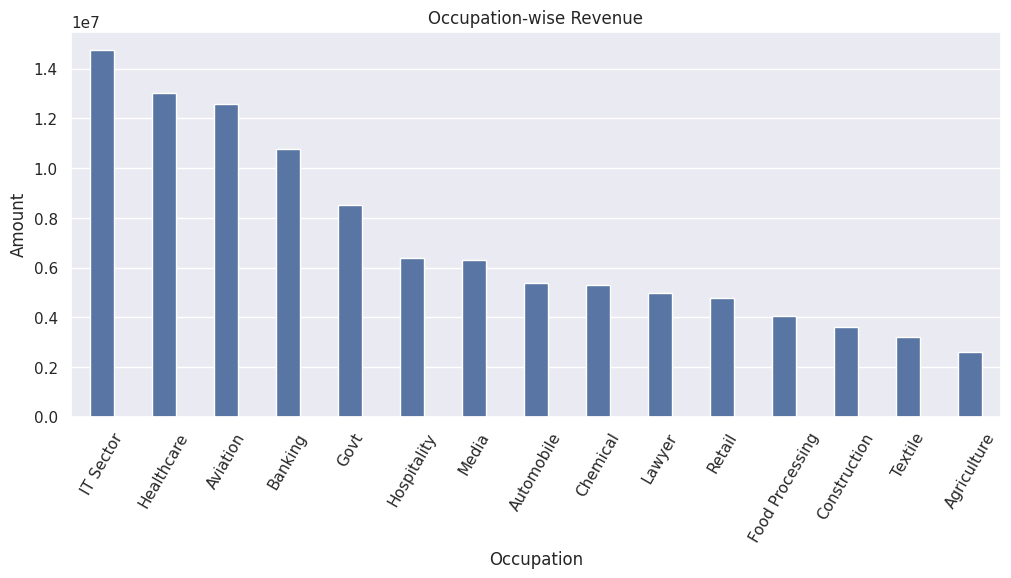

In [53]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount',width=0.4).set(title="Occupation-wise Revenue")
plt.xticks(rotation=60)
plt.show()

maximum amount of revenue is genrated by IT sector buyers

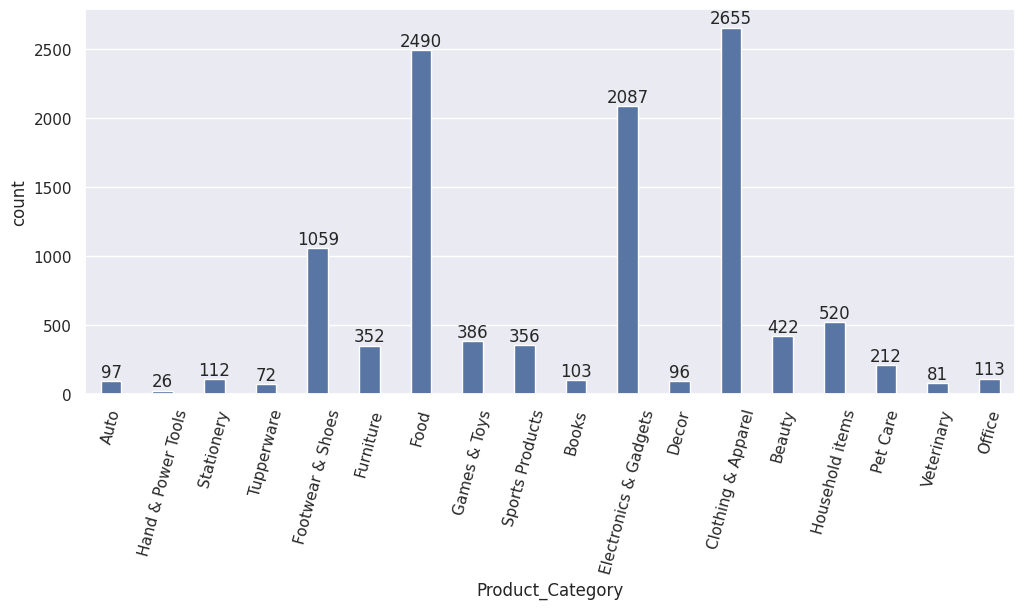

In [54]:
sns.set(rc={'figure.figsize':(12,5)})
ax=sns.countplot(data=df, x='Product_Category',width=0.4)

for bars in ax.containers:
  ax.bar_label(bars)
  plt.xticks(rotation=75)
  plt.show()

Cloting and apparel brought the maximum number of customers

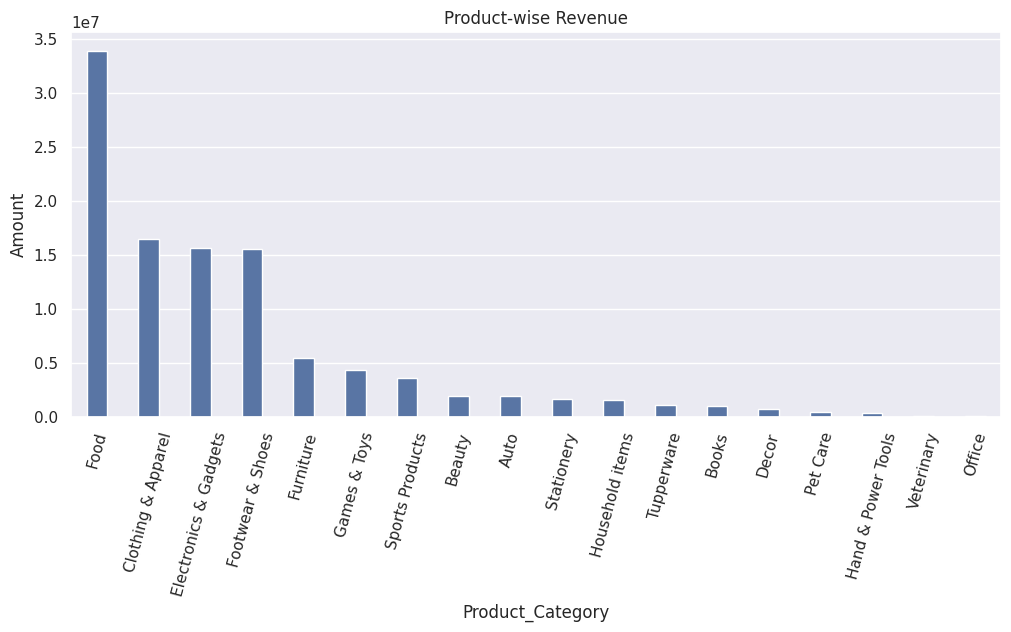

In [55]:
sales_state=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=sales_state,x='Product_Category', y='Amount',width=0.4).set(title="Product-wise Revenue")
plt.xticks(rotation=75)
plt.show()


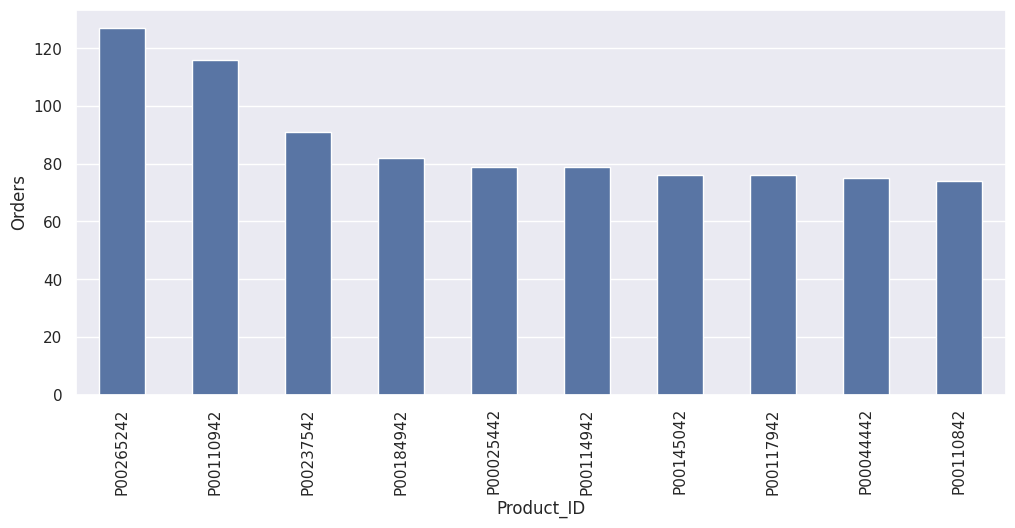

In [56]:
#top 10 most sold products
sales_state=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=sales_state,x='Product_ID', y='Orders',width=0.5)
plt.xticks(rotation=90)
plt.show()

# Conclusion

Unmarried woman in age group 26-35 years old from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics Category.